In [5]:
dirname = "/Users/gc3045/scmail_v1/sc-mail-experiments/Real_biodata/TLSCL/evaluation/Bar12"

In [6]:
prior_file = f"{dirname}/Bar12_priors.pickle"
msa_file = f"{dirname}/Bar12_character_matrix.txt"
tree_file = f"/Users/gc3045/scmail_v1/sc-mail-experiments/Real_biodata/TLSCL/evaluation/Bar12/Bar12_improved_final_with_polytomies_merged.nwk"
lentiviral_barcode_label_file = f"{dirname}/Bar12_labels.csv"
metadata_file = "/Users/gc3045/scmail_v1/sc-mail-experiments/Real_biodata/TLSCL/evaluation/Bar12/CellTypeAnnotation/Bar12_metadata.txt"

In [7]:
from laml_libs.sequence_lib import read_sequences, read_priors
from treeswift import read_tree_newick

In [8]:
t = read_tree_newick(tree_file)

In [60]:
# p = read_priors(prior_file)
msa, site_names = read_sequences(msa_file, delimiter="\t")

In [10]:
import pandas as pd

df = pd.read_csv(metadata_file, delimiter='\t')
df.index = df['cellBC']

In [11]:
df

,cellBC,intBC,UMI,cell_state,StF_Group
cellBC,,,,,
AAACCCAGTCTCTCAC-1,AAACCCAGTCTCTCAC-1,8,1107,['NeuralTube1'],['StF_2']
AAAGGATTCGCACGAC-1,AAAGGATTCGCACGAC-1,7,1004,['NMPs'],['empty']
AAAGGTAAGAATTGTG-1,AAAGGTAAGAATTGTG-1,7,1593,['NMPs'],['StF_4']
AAAGGTATCAATGTCG-1,AAAGGTATCAATGTCG-1,9,2045,['NMPs'],['empty']
AAAGGTATCGACTCCT-1,AAAGGTATCGACTCCT-1,6,453,['SomiteSclero'],['empty']
...,...,...,...,...,...
TTTCATGCAGCACGAA-1,TTTCATGCAGCACGAA-1,8,796,['Somite'],['StF_10']
TTTCGATTCACCATAG-1,TTTCGATTCACCATAG-1,7,377,['NMPs'],['StF_29']
TTTCGATTCTCGCCTA-1,TTTCGATTCTCGCCTA-1,8,1791,['NMPs'],['StF_2']


In [12]:
df.cell_state.unique()

array(["['NeuralTube1']", "['NMPs']", "['SomiteSclero']", "['pPSM']",
       "['Endoderm']", "['Somite']", "['SomiteDermo']", "['aPSM']",
       "['Somite0']", "['NeuralTube2']", "['PCGLC']", "['Somite-1']"],
      dtype=object)

In [13]:
import ast

for index, row in df.iterrows(): 
    # cell_state = ast.literal_eval(df.loc['TTTCATGCAGCACGAA-1','cell_state'])
    cell_state = ast.literal_eval(row['cell_state'])

    print(cell_state)

['NeuralTube1']
['NMPs']
['NMPs']
['NMPs']
['SomiteSclero']
['NMPs']
['NMPs']
['NeuralTube1']
['NMPs']
['pPSM']
['Endoderm']
['Somite']
['SomiteDermo']
['NeuralTube1']
['SomiteDermo']
['Somite']
['NMPs']
['NeuralTube1']
['NeuralTube1']
['NMPs']
['NMPs']
['NMPs']
['NMPs']
['NMPs']
['Somite']
['pPSM']
['pPSM']
['NMPs']
['NMPs']
['NMPs']
['aPSM']
['NeuralTube1']
['NMPs']
['NMPs']
['NMPs']
['NeuralTube1']
['NMPs']
['NMPs']
['NeuralTube1']
['NMPs']
['NMPs']
['Somite0']
['pPSM']
['pPSM']
['NMPs']
['pPSM']
['NMPs']
['NeuralTube1']
['NMPs']
['NeuralTube1']
['NeuralTube1']
['NMPs']
['NeuralTube1']
['pPSM']
['NMPs']
['NMPs']
['Somite']
['NeuralTube2']
['NeuralTube1']
['SomiteSclero']
['SomiteDermo']
['Somite']
['NMPs']
['Endoderm']
['NeuralTube1']
['aPSM']
['Somite']
['pPSM']
['pPSM']
['SomiteDermo']
['NMPs']
['NMPs']
['NeuralTube1']
['NMPs']
['aPSM']
['NMPs']
['pPSM']
['NMPs']
['NMPs']
['NMPs']
['aPSM']
['PCGLC']
['SomiteDermo']
['NMPs']
['Somite']
['NeuralTube1']
['NMPs']
['NMPs']
['NMPs']
['N

In [14]:
dev_tree_str = '(PCGLC:1,(Endothelial:1,(Endoderm:1,(((NeuralTube2:1)NeuralTube1:1,(((((SomiteDermo:1,SomiteSclero:1)Somite:1)Somite0:1)Somite-1:1)pPSM:1)aPSM:1)NMPs:1)Prog-derm-NMPs:1)Prog-lial-derm:1)Prog-PGCLC-lial:1)Prog;'
dev_tree = read_tree_newick(dev_tree_str)

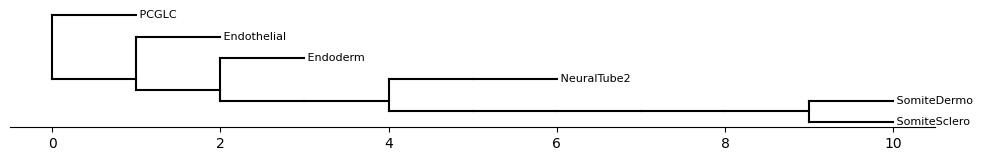

In [15]:
dev_tree.draw(show_labels=True)

In [16]:
dev_tree.num_nodes()

17

In [17]:
for node in dev_tree.traverse_postorder():
    print(node.label)

PCGLC
Endothelial
Endoderm
NeuralTube2
NeuralTube1
SomiteDermo
SomiteSclero
Somite
Somite0
Somite-1
pPSM
aPSM
NMPs
Prog-derm-NMPs
Prog-lial-derm
Prog-PGCLC-lial
Prog


In [22]:
all_cell_states = []
for n in dev_tree.traverse_postorder():
    if n.label is not None:
        all_cell_states.append(n.label)
all_cell_states

['PCGLC',
 'Endothelial',
 'Endoderm',
 'NeuralTube2',
 'NeuralTube1',
 'SomiteDermo',
 'SomiteSclero',
 'Somite',
 'Somite0',
 'Somite-1',
 'pPSM',
 'aPSM',
 'NMPs',
 'Prog-derm-NMPs',
 'Prog-lial-derm',
 'Prog-PGCLC-lial',
 'Prog']

In [23]:
# get LCA assignment given cell states
def get_lca(tree, states):
    return tree.mrca(states)

In [24]:
mrca = get_lca(dev_tree, ['SomiteDermo', 'NeuralTube2'])
mrca.label

'NMPs'

In [25]:
for node in t.traverse_postorder():
    if node.is_leaf():
        node.cell_state = ast.literal_eval(df.loc[node.label,'cell_state'])[0]
        # print("leaf cell state", node.cell_state)
    else:
        # get children
        child_cell_states = [c.cell_state for c in node.children]
        # print(child_cell_states)
        node.cell_state = get_lca(dev_tree, child_cell_states).label
        if node.cell_state is None:
            print(child_cell_states)
        

In [37]:
# get the set of cell_states represented here
represented_cell_states = set()
for node in t.traverse_postorder():
    represented_cell_states.add(node.cell_state)
represented_cell_states

{'Endoderm',
 'NMPs',
 'NeuralTube1',
 'NeuralTube2',
 'PCGLC',
 'Prog',
 'Prog-lial-derm',
 'Somite',
 'Somite-1',
 'Somite0',
 'SomiteDermo',
 'SomiteSclero',
 'aPSM',
 'pPSM'}

In [42]:
import numpy as np

num_intervals = 1000
intervals = np.linspace(0, 1, 1000, endpoint=False)
interval_dict = {}
for interval in intervals:
    interval_dict[interval] = {}
    for cell_state in represented_cell_states:
        interval_dict[interval][cell_state] = 0

In [43]:
t

In [44]:
# get the proportion of lineages 
# in each cell state 
for node in t.traverse_preorder():
    if node != t.root:
        branch_start = t.distance_between(t.root, node.get_parent())
        branch_end = t.distance_between(t.root, node)
        branch_interval = pd.Interval(branch_start, branch_end, closed='both')
        
        # start_cell_state = node.get_parent().cell_state
        end_cell_state = node.cell_state
        # print(end_cell_state)
        # print(branch_interval)
        for i, interval_start in enumerate(intervals[:-1]):
            interval_end = intervals[i+1]
            interval = pd.Interval(interval_start, interval_end, closed='both')
            if interval.overlaps(branch_interval):
                interval_dict[interval_start][end_cell_state] += 1


        ##start_cell_state = node.get_parent().cell_state
        ## end_cell_state = node.cell_state
        #if start_cell_state != end_cell_state:
        #    print(','.join([str(node_time), str(start_cell_state), str(end_cell_state)]))


In [45]:
interval_dict

{0.0: {'SomiteSclero': 0,
  'Endoderm': 0,
  'Prog-lial-derm': 3,
  'Somite': 0,
  'Somite-1': 0,
  'NeuralTube1': 0,
  'NMPs': 11,
  'SomiteDermo': 0,
  'PCGLC': 0,
  'pPSM': 0,
  'Prog': 1,
  'Somite0': 0,
  'NeuralTube2': 0,
  'aPSM': 0},
 0.001: {'SomiteSclero': 0,
  'Endoderm': 0,
  'Prog-lial-derm': 3,
  'Somite': 0,
  'Somite-1': 0,
  'NeuralTube1': 0,
  'NMPs': 11,
  'SomiteDermo': 0,
  'PCGLC': 0,
  'pPSM': 0,
  'Prog': 1,
  'Somite0': 0,
  'NeuralTube2': 0,
  'aPSM': 0},
 0.002: {'SomiteSclero': 0,
  'Endoderm': 0,
  'Prog-lial-derm': 3,
  'Somite': 0,
  'Somite-1': 0,
  'NeuralTube1': 0,
  'NMPs': 11,
  'SomiteDermo': 0,
  'PCGLC': 0,
  'pPSM': 0,
  'Prog': 1,
  'Somite0': 0,
  'NeuralTube2': 0,
  'aPSM': 0},
 0.003: {'SomiteSclero': 0,
  'Endoderm': 0,
  'Prog-lial-derm': 3,
  'Somite': 0,
  'Somite-1': 0,
  'NeuralTube1': 0,
  'NMPs': 11,
  'SomiteDermo': 0,
  'PCGLC': 0,
  'pPSM': 0,
  'Prog': 1,
  'Somite0': 0,
  'NeuralTube2': 0,
  'aPSM': 0},
 0.004: {'SomiteSclero': 0

In [46]:
interval_dict[0.999]

{'SomiteSclero': 0,
 'Endoderm': 0,
 'Prog-lial-derm': 0,
 'Somite': 0,
 'Somite-1': 0,
 'NeuralTube1': 0,
 'NMPs': 0,
 'SomiteDermo': 0,
 'PCGLC': 0,
 'pPSM': 0,
 'Prog': 0,
 'Somite0': 0,
 'NeuralTube2': 0,
 'aPSM': 0}

In [50]:
with open("bar12_improved_cellstates_over_time.csv", "w+") as w:
    
    
    w.write(','.join(['interval_start'] + list(represented_cell_states)) + '\n' )

    for interval in interval_dict:
        d = interval_dict[interval]
        cell_type_counts = [str(d[key]) for key in d.keys()]
        #total_sum = sum(cell_type_counts)
        #if total_sum > 0:
        #    cell_type_props = [str(n/float(total_sum)) for n in cell_type_counts]
        #else:
        #    cell_type_props = [str(n) for n in cell_type_counts]
        w.write(','.join([str(interval)] + cell_type_counts)+ '\n')


In [64]:
### explore if there are different cell lineages that develop into endoderm

### different cell lineages that develop into SomiteSclero

NT1_nodes = []

for node in t.traverse_preorder():
    if node.cell_state == "NeuralTube1":
        NT1_nodes.append(node)

    

In [65]:
ancestor_nodes = []
for node in NT1_nodes:
    n = node
    while n.parent.cell_state == "NeuralTube1":
        n = n.parent
    ancestor_nodes.append(n.parent)
ancestor_nodes = set(ancestor_nodes)

In [66]:
ancestor_nodes

{<treeswift.Node.Node at 0x10846f010>,
 <treeswift.Node.Node at 0x10846c490>}

In [72]:
t.num_nodes()

633

In [75]:
# tdr = t.distances_from_root(internal=True, leaves=True, weighted=True)
tdr_dict = dict()
for node in t.traverse_preorder():
    if node.is_root():
        tdr_dict[node] = 0
    else:
        tdr_dict[node] = node.edge_length + tdr_dict[node.parent]

print(len(tdr_dict))

633


In [77]:
len(ancestor_nodes)

57

In [76]:

for ancestor in ancestor_nodes:
    print(tdr_dict[ancestor])

0.7163791628173708
0.7132949681516515
0.46170621183561433
0.7949087675839426
0.8702872879872746
0.813657916147561
0.8887476294922168
0.3394746082894137
0.5793707983726526
0.832286609969084
0.6948190757050551
0.993551998647328
0.4100957852530756
0.6849630190175824
0.5537431937498052
0.8196151660282395
0.42290637212255877
0.5813352956143685
0.6827771567077116
0.6309305126686491
0.6702243450649539
0.6607674580740208
0.7426978555249774
0.5815646662739131
0.8947316970569889
0.5280448240435338
0.6753607384857263
0.7892002883432013
0.5384045471436657
0.25430037537593037
0.8650192174133677
0.9092101394389214
0.537367225169091
0.6422983371708183
0.8930398331167575
0.7258937494070218
0.5231091563548773
0.34737024469444255
0.7844601895659631
0.5919087478959218
0.8519932111127795
0.7343404219613093
0.6713859393413648
0.9676794127167252
0.47032215357629514
0.8165358487360984
0.8016950350265946
0.8770146443029837
0.46117604136614987
0.7742211315364386
0.5230061689796827
0.7705040057271701
0.78830918

In [57]:
represented_at_leaves = dict()
for node in t.traverse_leaves():
    if node.cell_state not in represented_at_leaves:
        represented_at_leaves[node.cell_state] = 0
    represented_at_leaves[node.cell_state] += 1


In [58]:
represented_at_leaves

{'NMPs': 156,
 'NeuralTube1': 75,
 'pPSM': 49,
 'Somite-1': 1,
 'SomiteSclero': 10,
 'Somite': 24,
 'Somite0': 5,
 'aPSM': 15,
 'Endoderm': 5,
 'SomiteDermo': 21,
 'NeuralTube2': 1,
 'PCGLC': 1}

In [62]:
len(msa)

363